In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#ইনলাইন প্লটিংয়ের জন্য জুপিটার নোটবুকের ম্যাজিক ফাংশন (আলাদা উইন্ডোতে প্লট শো করতে চাচ্ছি না আমরা)
%matplotlib inline

In [2]:


data_frame = pd.read_csv(r'/home/majedrifat/Desktop/pima-data.csv')



In [3]:
data_frame.shape

(768, 10)

In [4]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
data_frame.isnull()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [6]:
data_frame.isnull().values.any()

False

In [7]:
# Here size means plot-size
def corr_heatmap(data_frame, size=11):
  # Getting correlation using Pandas
  correlation = data_frame.corr()

  # Dividing the plot into subplots for increasing size of plots
  fig, heatmap = plt.subplots(figsize=(size, size))

  # Plotting the correlation heatmap
  heatmap.matshow(correlation)

  # Adding xticks and yticks
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)

  # Displaying the graph
  plt.show()


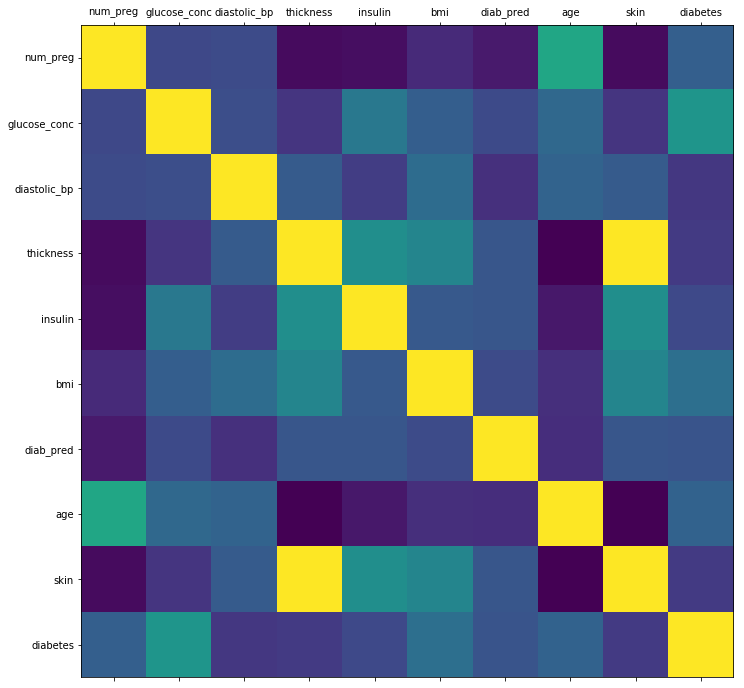

In [9]:
corr_heatmap(data_frame)

In [10]:
del data_frame['skin']
# Checking if the action was successful or not
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [11]:
# Mapping the values
map_diabetes = {True : 1, False : 0}

# Setting the map to the data_frame
data_frame['diabetes'] = data_frame['diabetes'].map(map_diabetes)

# Let's see what we have done
data_frame.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
from sklearn.cross_validation import train_test_split

feature_column_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

predicted_class_name = ['diabetes']

# Getting feature variable values

X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values

# Saving 30% for testing
split_test_size = 30

# Splitting using scikit-learn train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)


In [16]:
print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))


96.09% in training set
3.91% in test set


In [17]:
print("# rows in dataframe {0}".format(len(data_frame)))
print("# rows missing glucose_conc: {0}".format(len(data_frame.loc[data_frame['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(data_frame.loc[data_frame['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(data_frame.loc[data_frame['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(data_frame.loc[data_frame['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(data_frame.loc[data_frame['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(data_frame.loc[data_frame['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(data_frame.loc[data_frame['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [18]:
from sklearn.preprocessing import Imputer

#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [19]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None)

In [20]:
#this returns array of predicted results
prediction_from_trained_data = nb_model.predict(X_train)

In [22]:


# performance metrics library
from sklearn import metrics

# get current accuracy of the model

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our naive bayes model is : {0:.4f}".format(accuracy))



Accuracy of our naive bayes model is : 0.7588


In [23]:
# this returns array of predicted results from test_data
prediction_from_test_data = nb_model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of our naive bayes model is: {0:0.4f}".format(accuracy))

Accuracy of our naive bayes model is: 0.7000


In [24]:
print ("Confusion Matrix")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[ 3  4]
 [ 5 18]]


In [25]:
print ("Classification Report")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
             precision    recall  f1-score   support

          1       0.38      0.43      0.40         7
          0       0.82      0.78      0.80        23

avg / total       0.71      0.70      0.71        30



In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier object
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [27]:


rf_predict_train = rf_model.predict(X_train)

#get accuracy
rf_accuracy = metrics.accuracy_score(y_train, rf_predict_train)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy))



Accuracy: 0.9837


In [28]:
rf_predict_test = rf_model.predict(X_test)

#get accuracy
rf_accuracy_testdata = metrics.accuracy_score(y_test, rf_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(rf_accuracy_testdata))

Accuracy: 0.7000


In [29]:


print ("Confusion Matrix for Random Forest")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, rf_predict_test, labels=[1, 0])))



Confusion Matrix for Random Forest
[[ 2  5]
 [ 4 19]]

Classification Report

             precision    recall  f1-score   support

          1       0.33      0.29      0.31         7
          0       0.79      0.83      0.81        23

avg / total       0.68      0.70      0.69        30



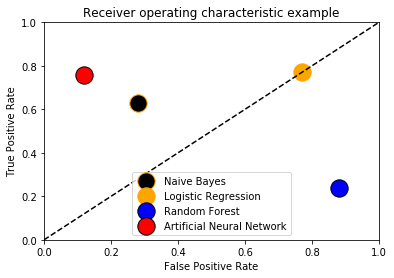

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# fpr, tpr
naive_bayes = np.array([0.28, 0.63])
logistic = np.array([0.77, 0.77])
random_forest = np.array([0.88, 0.24])
ann = np.array([0.12, 0.76])

# plotting
plt.scatter(naive_bayes[0], naive_bayes[1], label = 'Naive Bayes', facecolors='black', edgecolors='orange', s=300)
plt.scatter(logistic[0], logistic[1], label = 'Logistic Regression', facecolors='orange', edgecolors='orange', s=300)
plt.scatter(random_forest[0], random_forest[1], label = 'Random Forest', facecolors='blue', edgecolors='black', s=300)
plt.scatter(ann[0], ann[1], label = 'Artificial Neural Network', facecolors='red', edgecolors='black', s=300)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower center')

plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print ("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

print ("Confusion Matrix")

print (metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]))

print ("")

print ("Classification Report")

print (metrics.classification_report(y_test, lr_predict_test, labels=[1, 0]))
#Logistic Regression মডেলে Regularization Hyperparameter টিউনিংয়ের মাধ্যমে অ্যাকুরেসি বাড়ানো

Accuracy : 0.7000
Confusion Matrix
[[ 3  4]
 [ 5 18]]

Classification Report
             precision    recall  f1-score   support

          1       0.38      0.43      0.40         7
          0       0.82      0.78      0.80        23

avg / total       0.71      0.70      0.71        30



1st max value of 0.714 occured at C=0.100


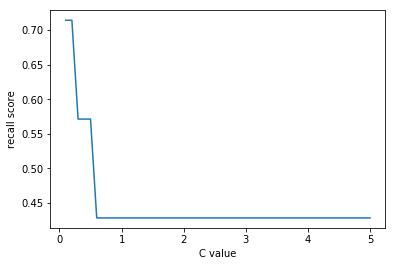

In [34]:
#C (Regularization Hyperparameter) এর মান নির্ণয়
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start

best_recall_score = 0

while (C_val < C_end):
    C_values.append(C_val)

    lr_model_loop = LogisticRegression(C=C_val, random_state=42)

    lr_model_loop.fit(X_train, y_train.ravel())

    lr_predict_loop_test = lr_model_loop.predict(X_test)

    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)

    recall_scores.append(recall_score)

    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print ("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

1st max value of 0.857 occured at C=0.100


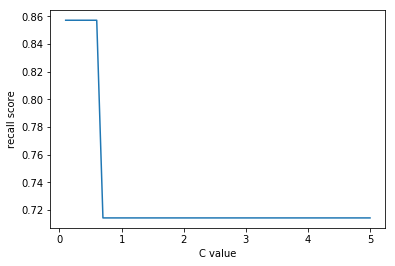

In [35]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)

    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)

    lr_model_loop.fit(X_train, y_train.ravel())

    lr_predict_loop_test = lr_model_loop.predict(X_test)

    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)

    recall_scores.append(recall_score)

    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print ("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [36]:
#confution matrix
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print( "Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print( metrics.confusion_matrix(y_test, lr_predict_test, labels=[1, 0]) )
print ("")
print ("Classification Report")
print (metrics.classification_report(y_test, lr_predict_test, labels=[1,0]))
print (metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.6667
[[ 6  1]
 [ 9 14]]

Classification Report
             precision    recall  f1-score   support

          1       0.40      0.86      0.55         7
          0       0.93      0.61      0.74        23

avg / total       0.81      0.67      0.69        30

0.857142857143


In [38]:
#croos velidation
from sklearn.linear_model import LogisticRegressionCV

lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  

# set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print ("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print (metrics.confusion_matrix(y_test, lr_cv_predict_test, labels=[1, 0]) )
print ("")
print ("Classification Report")
print( metrics.classification_report(y_test, lr_cv_predict_test, labels=[1,0]))

Accuracy: 0.6667
[[ 4  3]
 [ 7 16]]

Classification Report
             precision    recall  f1-score   support

          1       0.36      0.57      0.44         7
          0       0.84      0.70      0.76        23

avg / total       0.73      0.67      0.69        30

